## SVM Results Analysis
This analysis evaluates the effectiveness of features extracted from different layers of an MLP (Multi-Layer Perceptron) for training an SVM (Support Vector Machine) classifier. We compare performance across image sizes (16x16 and 32x32) to determine the optimal configuration for the final classification task.

In [1]:
import sys
import os
# Add the directory to path (if needed)
sys.path.append('/ghome/group04/C3/Benet/project-4/Week2')

import plot_svm_results as svm_plots
import matplotlib.pyplot as plt

### Experimental Setup
Using the optimized MLP models for image sizes 16 and 32, we conducted a grid search to identify the best feature descriptors and SVM hyperparameters. 

**Key variables explored:**
* **Layers:** 0, 1, 2, 3, output, concatenation of all layers.
* **Kernels:** Linear, RBF, Poly, and Sigmoid.
* **C-Values:** Regularization strengths (C): 0.01, 0.1, 1, 5, 7, 10.

Here are the head of the results of the experiments tried:

In [2]:
# 1. Load Data
df = svm_plots.load_svm_data() # Uses default paths
# Or specify paths: df = svm_plots.load_svm_data({16: "path/to/csv", ...})


# Filter for Image Size 16
df_16 = df[df['ImgSize'] == 16]
df_16.head()

,config_name,layer,base_config,params,cv_mean_test_accuracy,cv_std_test_accuracy,cv_mean_train_accuracy,cv_std_train_accuracy,mean_execution_time,n_features,ImgSize,kernel,C
0,L0_linear_C0.01,0,linear_C0.01,"{'name': 'linear_C0.01', 'kernel': 'linear', '...",0.286897,0.016326,0.348851,0.006414,35.278562,1024,16,linear,0.01
1,L0_linear_C0.1,0,linear_C0.1,"{'name': 'linear_C0.1', 'kernel': 'linear', 'C...",0.292529,0.014388,0.456753,0.004111,27.571367,1024,16,linear,0.10
2,L0_linear_C1,0,linear_C1,"{'name': 'linear_C1', 'kernel': 'linear', 'C':...",0.268736,0.013078,0.684655,0.002112,36.280914,1024,16,linear,1.00
3,L0_linear_C5,0,linear_C5,"{'name': 'linear_C5', 'kernel': 'linear', 'C':...",0.242989,0.010367,0.903161,0.001900,44.142556,1024,16,linear,5.00
4,L0_rbf_C0.01,0,rbf_C0.01,"{'name': 'rbf_C0.01', 'kernel': 'rbf', 'C': 0....",0.234943,0.023933,0.272471,0.006680,79.547755,1024,16,rbf,0.01


In [3]:
# Filter for Image Size 32
df_32 = df[df['ImgSize'] == 32]
df_32.head()

,config_name,layer,base_config,params,cv_mean_test_accuracy,cv_std_test_accuracy,cv_mean_train_accuracy,cv_std_train_accuracy,mean_execution_time,n_features,ImgSize,kernel,C
108,L0_linear_C0.01,0,linear_C0.01,"{'name': 'linear_C0.01', 'kernel': 'linear', '...",0.286897,0.014847,0.348793,0.006596,74.359649,1024,32,linear,0.01
109,L0_linear_C0.1,0,linear_C0.1,"{'name': 'linear_C0.1', 'kernel': 'linear', 'C...",0.293908,0.009965,0.454770,0.001629,80.585061,1024,32,linear,0.10
110,L0_linear_C1,0,linear_C1,"{'name': 'linear_C1', 'kernel': 'linear', 'C':...",0.269540,0.010080,0.676494,0.003541,60.993610,1024,32,linear,1.00
111,L0_linear_C5,0,linear_C5,"{'name': 'linear_C5', 'kernel': 'linear', 'C':...",0.241264,0.012504,0.894540,0.003964,59.519398,1024,32,linear,5.00
112,L0_rbf_C0.01,0,rbf_C0.01,"{'name': 'rbf_C0.01', 'kernel': 'rbf', 'C': 0....",0.232414,0.024347,0.270029,0.008703,78.562285,1024,32,rbf,0.01


### Visualization and Validation Methodology
The following plots illustrate the relationship between feature depth and classification accuracy.

**Note on Metrics:**
* **Validation Accuracy:** Mean of 5-fold cross-validation runs.
* **Training Accuracy:** Mean performance on training folds to monitor for overfitting.
* **Data Split:** Evaluation is restricted to training/validation data. The independent test set is reserved exclusively for the final assessment of the champion model.

**Hypothesis:** Features from Layer 3 or the Output layer will yield the highest accuracy. As data moves deeper into the network, neurons learn more complex, task-specific abstractions that should be more linearly separable than raw pixel data.

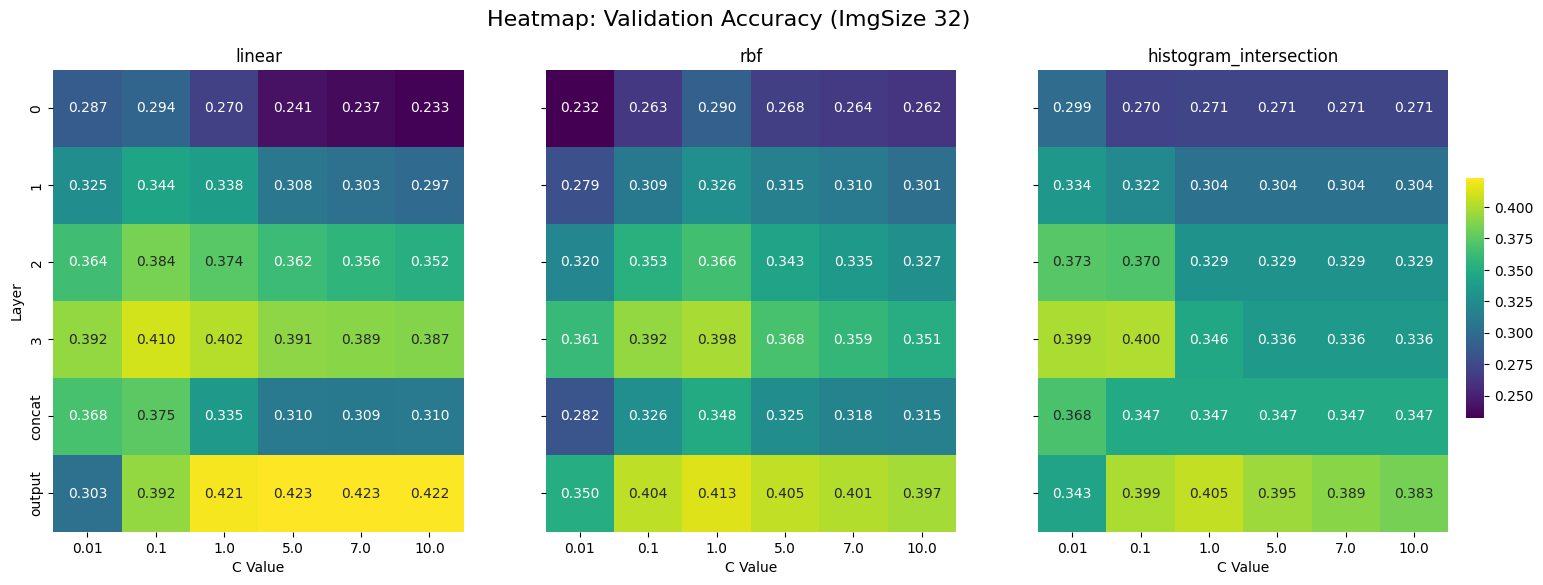

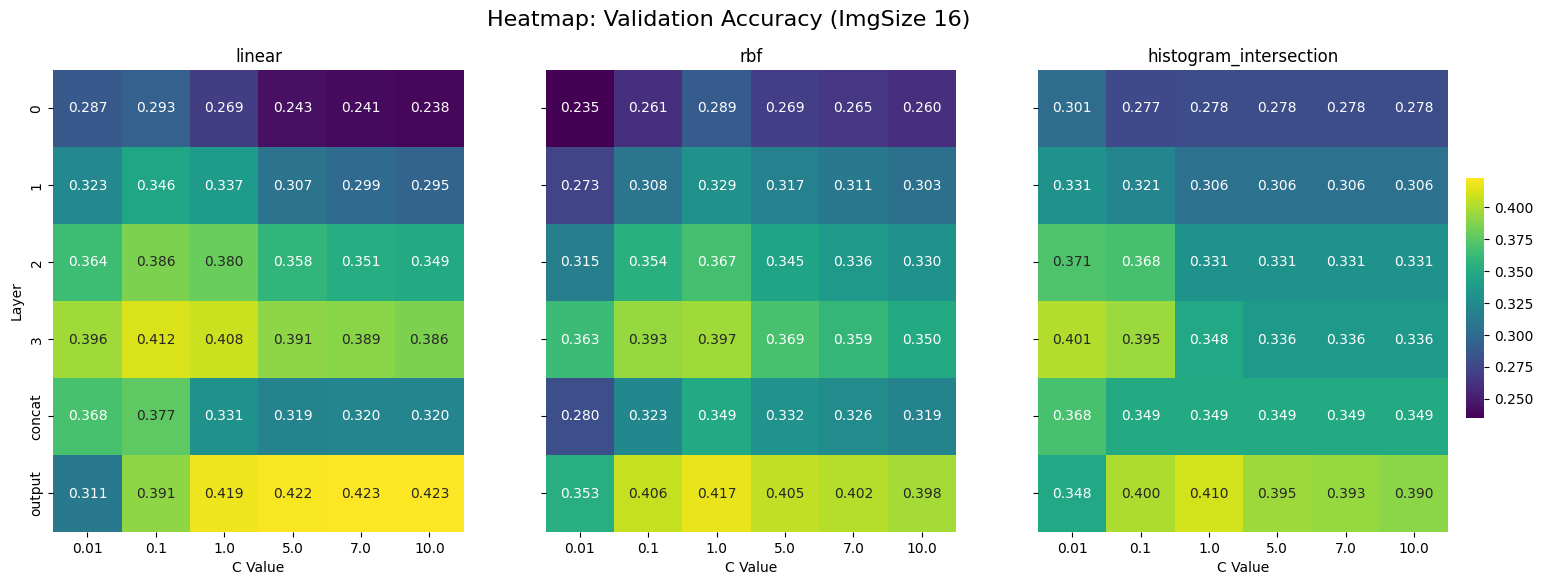

In [4]:
# Heatmap: Validation Accuracy 
# for ImgSize 32
svm_plots.plot_heatmap(df_32, 'cv_mean_test_accuracy', 'Validation Accuracy', cmap='viridis')
# for ImgSize 16
svm_plots.plot_heatmap(df_16, 'cv_mean_test_accuracy', 'Validation Accuracy', cmap='viridis')

**Hypothesis: [Verified]**
The results confirm that deeper layers provide superior descriptors. Peak performance is achieved at the **Output Layer**, followed by **Layer 3**. This validates that as data traverses the MLP, features become more abstract and task-specific, making them significantly more linearly separable for the SVM.

**Key Observations from Validation Accuracy:**
* **Consistency across Image Sizes:** Both 16x16 and 32x32 models exhibit nearly identical trends. The MLP's feature extraction logic is robust to input resolution, though 32x32 provides a slight (~1-2%) advantage in peak accuracy.
* **Layer Patterns:** All kernels follow a similar pattern across layers. We observe a performance dip in lower layers (L0, L1), indicating that beginning layers are less discriminative than the final task-specific layers.
* **Kernel Performance, Linear (Optimal):** Most stable and highest validation accuracy (~43%). It effectively leverages the high-dimensional mapping already performed by the MLP.


**Hypothesis:** High values of $C$ (lower regularization) will lead to overfitting, as the SVM will prioritize classifying every training point correctly over finding a wider, more generalizable margin. The **RBF kernel** will exhibit the highest degree of overfitting due to its non-linear flexibility, while the **Linear kernel** will be the most robust against memorization.

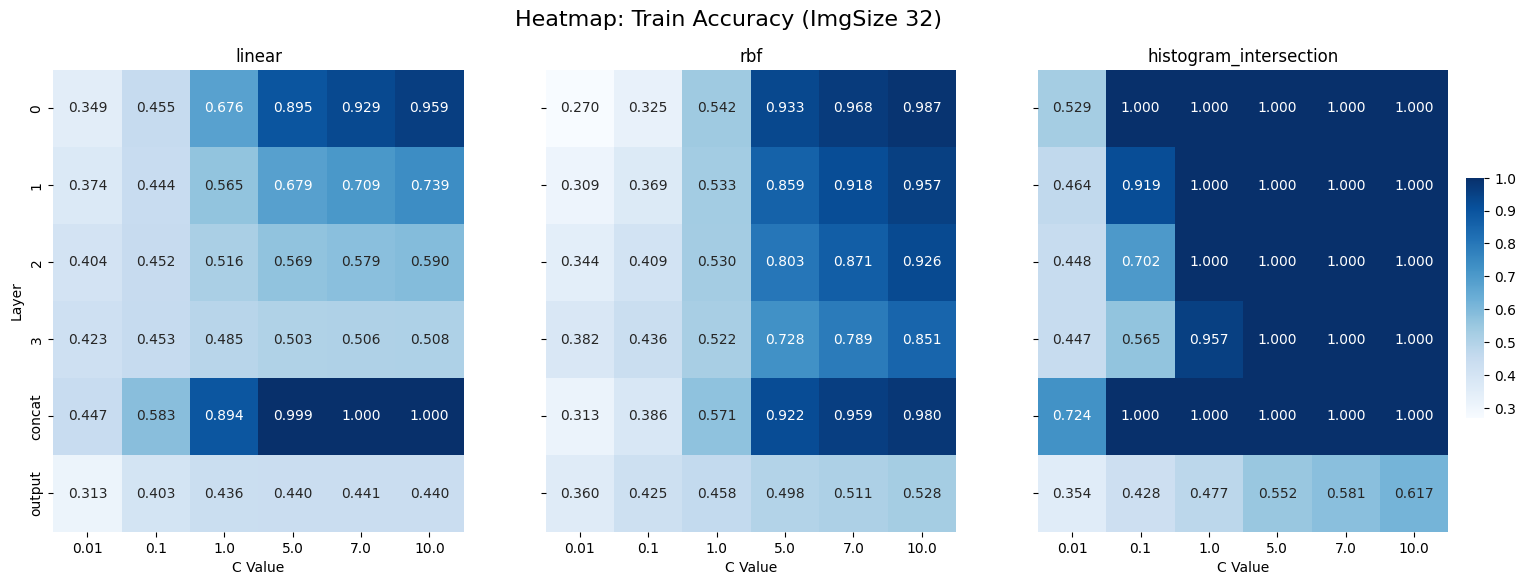

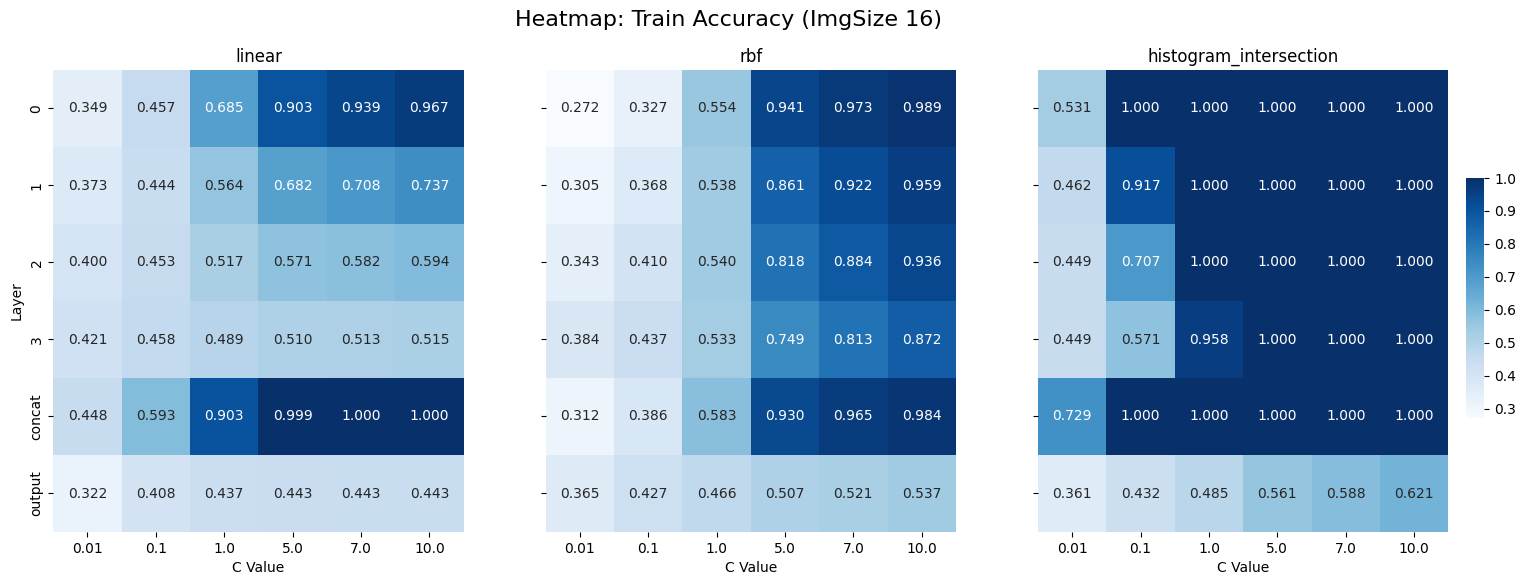

In [5]:
# Heatmap: Train Accuracy 
# for ImgSize 32
svm_plots.plot_heatmap(df_32, 'cv_mean_train_accuracy', 'Train Accuracy', cmap='Blues')
# for ImgSize 16
svm_plots.plot_heatmap(df_16, 'cv_mean_train_accuracy', 'Train Accuracy', cmap='Blues')

**Hypothesis: Partially Validated**

The comparison between training and validation accuracy reveals several key insights:

* **Kernel Overfitting:** The hypothesis regarding kernels was strongly confirmed. The **RBF kernel** shows near 100% training accuracy but significantly lower validation accuracy, indicating it is "memorizing" the training set. In contrast, the **Linear kernel** maintains a much smaller gap between training and validation, demonstrating superior generalization.
* **The Output Layer Advantage:** Interestingly, the **Output layer** exhibits the least amount of overfitting. This is because the MLP has already performed the non-linear transformation and "argmax-style" discrimination. By the time features reach the Output layer, they are highly refined for the classification task. This "pre-alignment" allows the SVM to find a robust decision boundary without having to overfit the training noise.
* **Impact of $C$ Value:** While higher $C$ values typically increase the risk of overfitting, the Output layer features are so discriminative that even with **$C=5$**, we observe a plateau in accuracy rather than a performance collapse. The features are naturally separable enough that the model remains stable.

**Final Selection:**
The **Linear Kernel** using **Output Layer** features with **$C=5$** is our champion model. It achieves the highest validation accuracy (~43%) with virtually no overfitting, ensuring the best possible generalization for the final test set evaluation.

### Final Analysis on the test set

In [6]:
import train_eval_best_svm as best_svm

# Load Data and Model once
train_ds, test_ds, model = best_svm.load_resources()

Using device: cpu
Loading data config from configs/config_best_ImgSize_32.json
Loading MLP weights from best_models/ImgSize_32/ImgSize_32.pth


/export/home/group04/C3/Benet/project-4/Week2/train_eval_best_svm.py:470: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_weights_path, 

### Evaluation of SVM

Extracting features for SVM (Layer: output)...


Extracting Features: 100%|██████████| 9/9 [00:01<00:00,  8.83it/s]


Normalizing (L2) and Scaling (MinMax) for SVM...
Loading existing SVM model from results_best_svm/svm_linear_C1.joblib...
Predicting...

 SVM RESULTS 
Accuracy: 0.3123
Precision: 0.3081
Recall: 0.3123
F1_score: 0.3053
Saved confusion_matrix.png to results_best_svm/linear_C1_Loutput
Saved roc_auc_curve.png to results_best_svm/linear_C1_Loutput


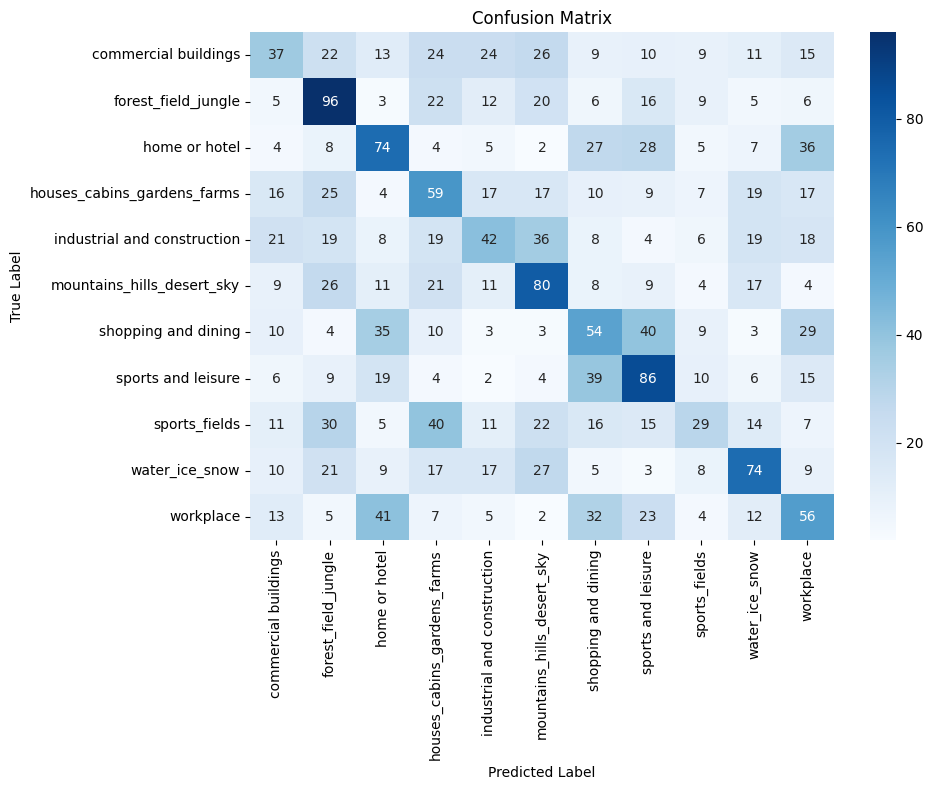

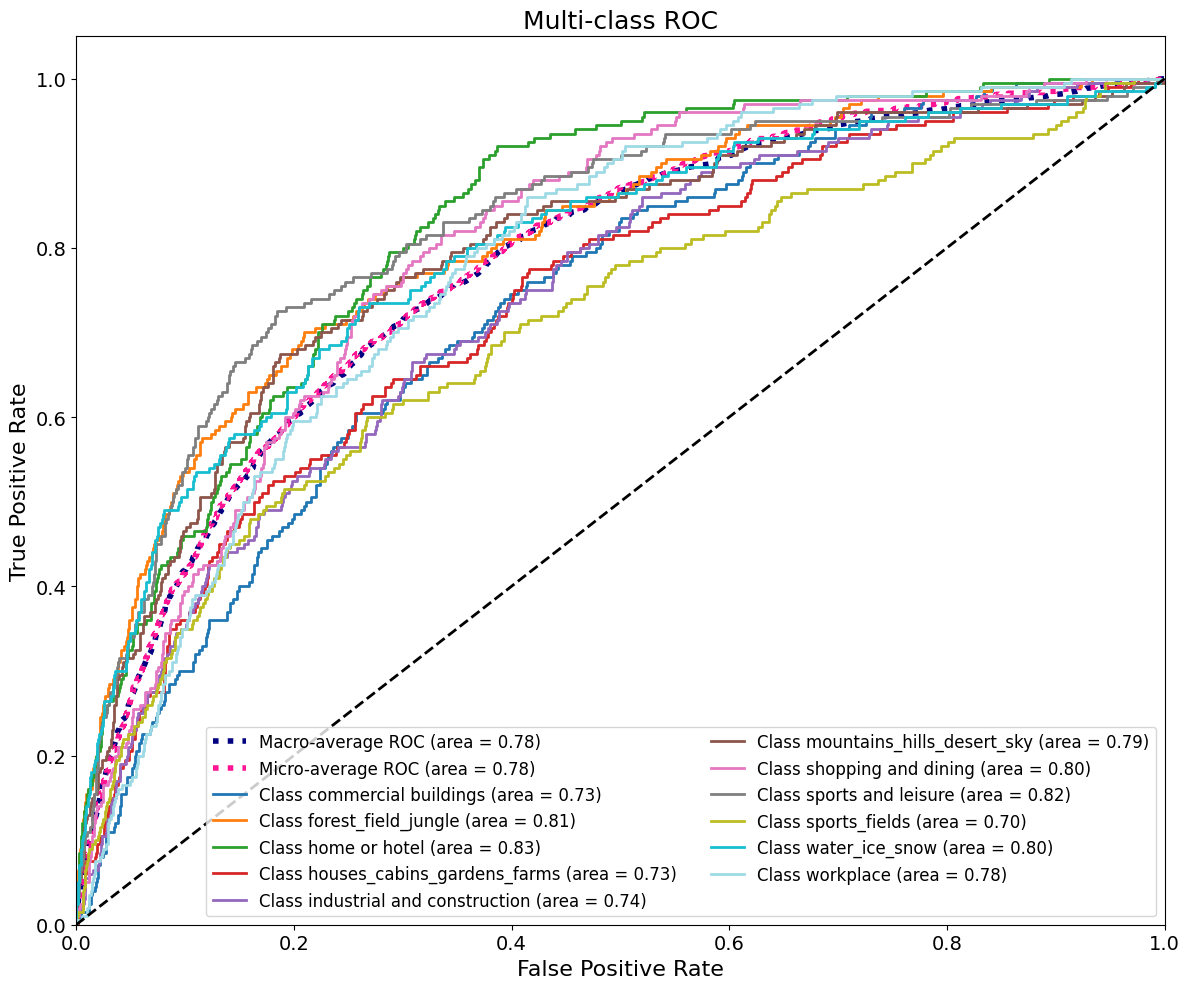

In [7]:
#Evaluate SVM (Will now use C=1, layer='output')
svm_metrics, (svm_fig_cm, svm_fig_roc) = best_svm.run_svm_eval(train_ds, test_ds, model)

Explanation of the Results:

The CV-to-Test Discrepancy: The minimal gap between CV Train Accuracy (~44) and CV Validation Accuracy (~42) indicates that the SVM is generalizing well within its provided feature space and not overfitting. However, the significant drop to 31.23% on the independent Test set suggests a substantial data distribution shift, where the test partition is inherently more challenging than the training/validation data. Furthermore, because the SVM relies on the MLP's "Output" layer features, its final performance is strictly capped by the MLP's own discriminative robustness; if the learned features do not generalize to the test set, the SVM cannot recover the lost task-specific information.



## Evaluation of MLP

Evaluating MLP...


MLP Eval: 100%|██████████| 9/9 [00:00<00:00,  9.13it/s]



 MLP RESULTS 
Accuracy: 0.3214
Precision: 0.3210
Recall: 0.3214
F1_score: 0.3188
Saved confusion_matrix.png to results_best_svm/mlp_ImgSize_32
Saved roc_auc_curve.png to results_best_svm/mlp_ImgSize_32


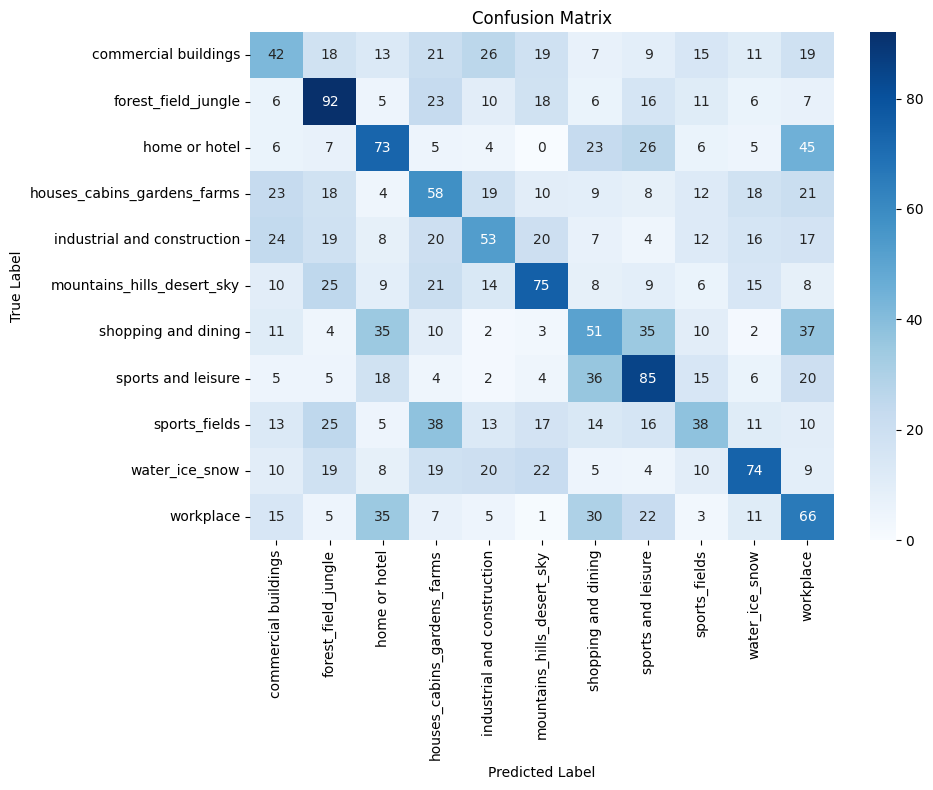

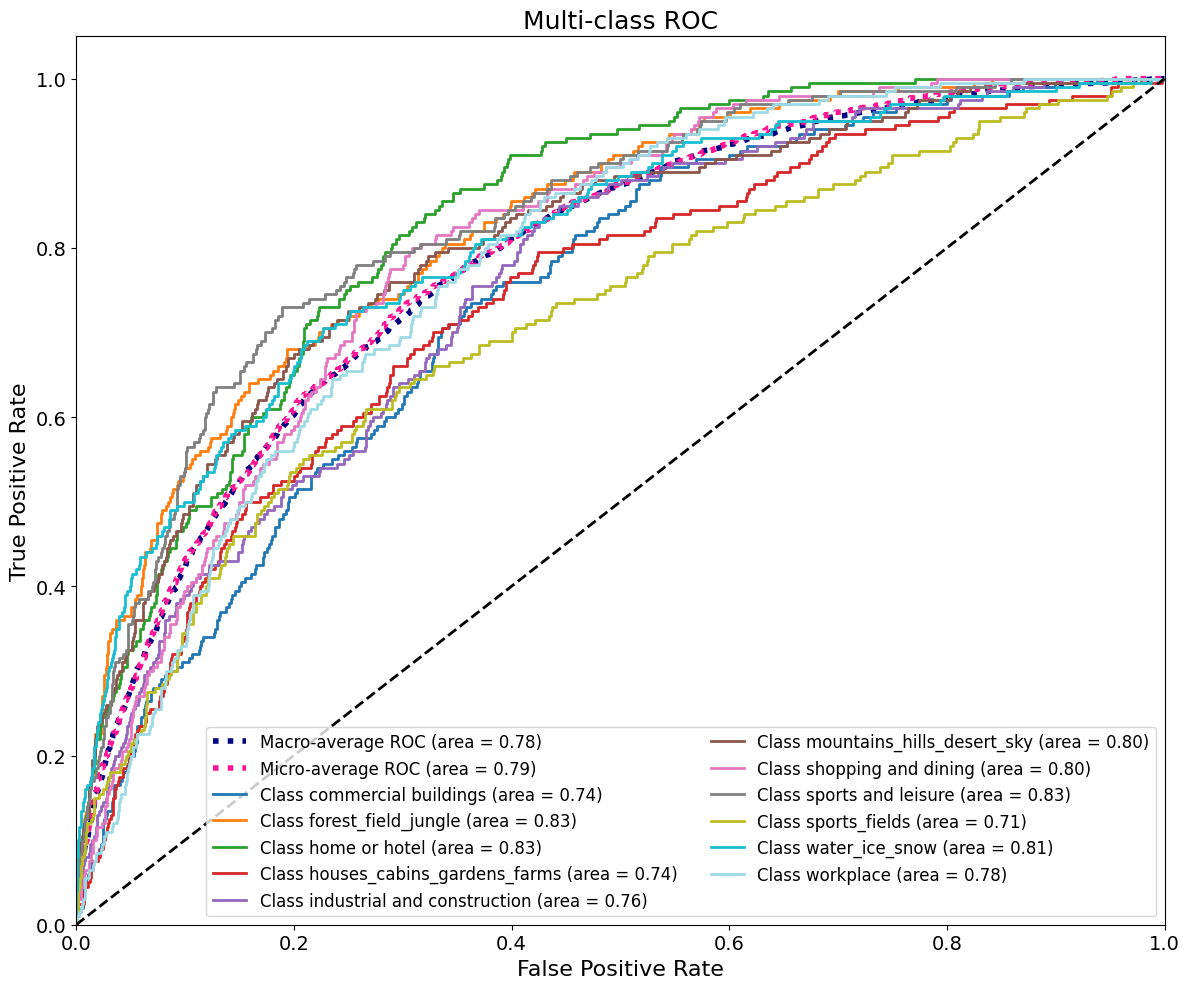

In [8]:
# Evaluate MLP
mlp_metrics, (mlp_fig_cm, mlp_fig_roc) = best_svm.run_mlp_eval(test_ds, model)
